In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# read in csv

df = pd.read_csv('/Users/juhee/Desktop/GA/Submissions/Projects/project_3-master/data/reddit_final.csv')

print(df.shape)
df.head()

(5995, 5)


,subreddit,text_all,y,texts_cleaned,post_w_cnt
0,relationship_advice,BI 58 Male Caught With Guy I'am a bi 58 year o...,1,bi male caught with guy i am a year old have...,139
1,legaladvice,When a dealer gets arrested do his roommates g...,0,when a dealer get arrested do his roommate get...,36
2,relationship_advice,My(14M) friend (14F) that I’ve been talking to...,1,my m friend f that i ve been talking to just t...,184
3,relationship_advice,Did my boyfriend and I make the right assumpti...,1,did my boyfriend and i make the right assumpti...,356
4,relationship_advice,Tough patch in our relationship of four years ...,1,tough patch in our relationship of four year m...,206


## Best Model

In [12]:
# set up X and y and train test split

X = df['texts_cleaned']
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 42, stratify = y)

In [13]:
# establish baseline accuracy

y_test.value_counts(normalize = True)

1    0.744821
0    0.255179
Name: y, dtype: float64

### CountVectorizer() with Multinomial Naive Bayes

In [27]:
# set a pipeline with Multinomial Bayes

pipeline_nb = Pipeline([
                       ('cvec', CountVectorizer()),
                       ('nb', MultinomialNB())
                       ])

param_grid = {
    'cvec__max_features': [6000],
    'cvec__min_df': [1],
    'cvec__max_df': [0.85],
    'cvec__stop_words': [None]
}

In [28]:
# instantiate GridSearchCV - NaiveBayes

gs = GridSearchCV(pipeline_nb, 
                  param_grid = param_grid,
                  cv = 5) 

In [29]:
# cross validation

cross_val_score(pipeline_nb, X_train, y_train).mean()

0.9322710854197258

In [30]:
# fit the training set

gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.85], 'cvec__max_features': [6000],
                         'cvec__min_df': [1], 'cvec__stop_words': [None]})

In [31]:
# train set score

print(f'Multinomial Naive Bayes: {gs.score(X_train, y_train)}')

Multinomial Naive Bayes: 0.9509462151394422


In [32]:
# test set score

print(f'Multinomial Naive Bayes: {gs.score(X_test, y_test)}')

Multinomial Naive Bayes: 0.9388580090955028


In [33]:
# predictions

y_preds = gs.predict(X_test)

# confusion matrix values

tn, fp, fn, tp = confusion_matrix(y_test, y_preds).ravel()

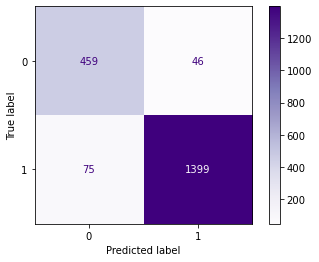

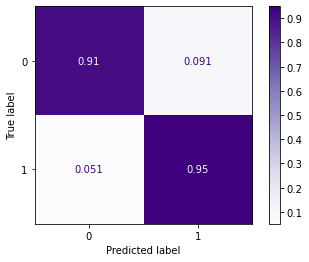

In [34]:
# view confusion matrix

# not normalized
plot_confusion_matrix(gs, X_test, y_test, cmap = 'Purples')
plt.savefig('./images/confusion_raw.png');

# normalized
plot_confusion_matrix(gs, X_test, y_test, cmap = 'Purples', normalize = 'true')
plt.savefig('./images/confusion_normal.png');

In [35]:
# calculate sensitivity and specificity

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')

Sensitivity: 0.9491180461329715
Specificity: 0.9089108910891089


In [36]:
# precision and accuracy

precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)

print(f'Precision: {precision}')
print(f'Accuracy: {accuracy}')

Precision: 0.9681660899653979
Accuracy: 0.9388580090955028
